## Exploratory Financial Data analysis.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
card_Data = pd.read_csv('dataset/cleanData/card_Data_cleaned.csv')
client_Data = pd.read_csv('dataset/cleanData/client_Data_cleaned.csv')
loan_data = pd.read_csv('dataset/cleanData/loan_data_cleaned.csv')
disp_data = pd.read_csv('dataset/cleanData/disp_data_cleaned.csv')

### types of cards offered by the bank

In [5]:
card_Data.card_type.unique()

array(['classic', 'junior', 'gold'], dtype=object)

### Client Age and gender Analysis

(array([  6., 150., 426., 345., 387., 358., 382., 372., 344., 371., 372.,
        392., 367., 254., 205., 189., 186., 185.,  66.,  12.]),
 array([ 34.32876712,  38.13657534,  41.94438356,  45.75219178,
         49.56      ,  53.36780822,  57.17561644,  60.98342466,
         64.79123288,  68.5990411 ,  72.40684932,  76.21465753,
         80.02246575,  83.83027397,  87.63808219,  91.44589041,
         95.25369863,  99.06150685, 102.86931507, 106.67712329,
        110.48493151]),
 <BarContainer object of 20 artists>)

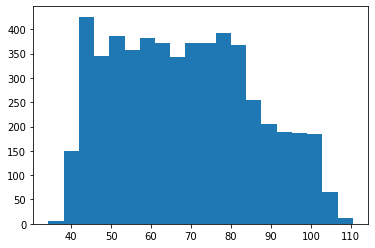

In [10]:
plt.hist(client_Data['age'], 20)

array([<AxesSubplot:title={'center':'gender'}>], dtype=object)

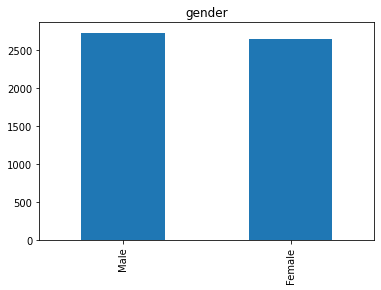

In [11]:
client_Data['gender'].value_counts().plot(kind='bar', subplots=True)

as we can see we have no minors in the database

In [15]:
minors = client_Data.age < 18
minors.sum()

0

But we have 214 very old people(no loans for these people)

In [23]:
seniors_table = client_Data.loc[client_Data.age >100]
seniors_table.shape
seniors_table.to_csv('eda/seniors_table.csv')

These are all the accounts that have asked for loans(unique)

In [27]:
who_has_loans = loan_data.account_id.unique()
who_has_loans

array([ 1787,  1801,  9188,  1843, 11013,  8261, 11265,  5428, 10973,
        4894, 10364,  5270,  6034,  6701,  2705,  7123, 10320,  9034,
        9236, 10266,     2,  7401,  2486,  1071,  8475, 11111,  1603,
        1166,  8073, 10940,  5313, 11135,  2694,  7753,  7445,  7485,
        8330,  6555, 10079,  5385,  5891, 10131,  8321,  5256,   813,
        2933,  8173,  9833,  7769,  6473,  7454,  6930,   173,  8051,
       10439,  9337,  4576,  8027,  5927,  6273, 11065,  8558,  5442,
        1811,  7844,  4260,  3354,  2762,  6051,  9265,  5228,  2824,
         426,  4937,   790, 10911,  8129,  2176,  9093,  5215,  9403,
        9104,  5120,  8519, 10788,  8260,  4259, 10105,  3050,  3674,
        5481,  9307,  4427,  3834,  7824,  8566,  7965,  5952,  6040,
        4448,  8982,  6363,  1012,  2167,  5622,  5991,   290,  6148,
        7133,  8041,  1106,  1527,  1978,  4337,  2345, 10451,  6425,
        6226,   344,  2962, 10738,  3747,  7523,  3166,  6118,   816,
        9640,  6715,

All clients with unpayed finished contracts

In [28]:
loan_data.status.unique()

array(['Contract Finished/Not Payed', 'Contract Finished/No Problems',
       'Running Contract/OK', 'Running Contract/Debt'], dtype=object)

In [31]:
unpayed_loans = loan_data.loc[(loan_data.account_id) & (loan_data.status == 'Contract Finished/Not Payed')]
unpayed_loans.to_csv('eda/unpayed_loans.csv')
unpayed_loans

,loan_id,account_id,date_of_loan,amount,duration,monthly_payment,status_code,status
0,5314,1787,1993-07-05,96396,12,8033.0,B,Contract Finished/Not Payed
28,6650,8073,1994-02-17,49320,12,4110.0,B,Contract Finished/Not Payed
41,7066,10131,1994-05-02,215388,36,5983.0,B,Contract Finished/Not Payed
49,6316,6473,1994-05-26,76908,12,6409.0,B,Contract Finished/Not Payed
58,6210,5927,1994-06-06,87216,48,1817.0,B,Contract Finished/Not Payed
68,6232,6051,1994-07-08,276660,36,7685.0,B,Contract Finished/Not Payed
111,5269,1527,1994-11-19,164052,36,4557.0,B,Contract Finished/Not Payed
140,7241,11021,1995-03-04,168984,24,7041.0,B,Contract Finished/Not Payed
155,5352,1993,1995-04-15,68400,12,5700.0,B,Contract Finished/Not Payed
158,5045,347,1995-05-01,187224,24,7801.0,B,Contract Finished/Not Payed


### clients with credit cards

In [35]:
combined = client_Data.merge(disp_data, how='outer', left_on='client_id', right_on='client_id')
combined = combined.merge(card_Data, how='outer', left_on='disp_id', right_on='disp_id')
combined.to_csv('eda/client_card_merge.csv')

In [38]:
combined.card_type.unique()

array([nan, 'gold', 'classic', 'junior'], dtype=object)

In [44]:
credit_cards = combined.loc[(combined.client_id) & (combined.card_id.notnull())]
credit_cards.to_csv('eda/clients_with_credit_cards.csv')
credit_cards


,client_id,district_id,date_of_birth,gender,age,disp_id,account_id,type,Unnamed: 0,card_id,card_type,date_of_issue
8,9,60,1935-10-16,Male,86.312329,9,7,OWNER,777.0,1.0,gold,1998-10-16
18,19,47,1942-12-28,Male,79.106849,19,14,OWNER,508.0,2.0,classic,1998-03-13
38,41,22,1968-08-27,Male,53.424658,41,33,OWNER,64.0,3.0,gold,1995-09-03
48,51,36,1979-12-02,Female,42.153425,51,43,OWNER,40.0,5.0,junior,1995-04-24
72,77,1,1956-02-18,Female,65.956164,77,66,OWNER,188.0,10.0,classic,1996-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...
5301,13095,76,1950-03-16,Male,71.887671,12787,10650,OWNER,707.0,1195.0,gold,1998-09-04
5304,13113,11,1976-11-25,Male,45.172603,12805,10663,OWNER,297.0,1196.0,classic,1997-06-27
5311,13201,31,1937-05-17,Male,84.726027,12893,10738,OWNER,364.0,1203.0,classic,1997-09-26
5324,13405,32,1958-08-13,Male,63.471233,13097,10905,OWNER,579.0,1216.0,classic,1998-05-26
